1.权重的初始值:为什么不能将权重初始值设成一样的值呢？这是因为在误差反向传播法中，所有的权重值都会进行相同的更新。

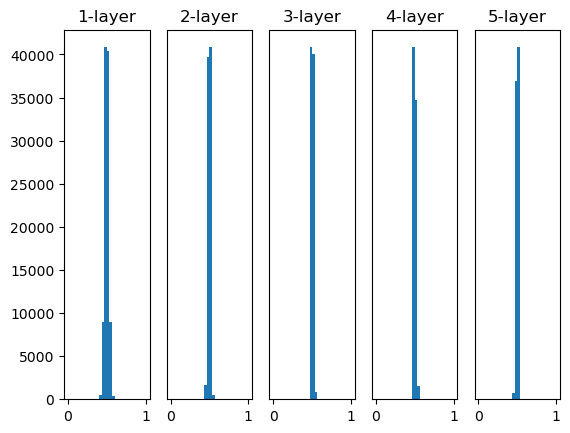

In [ ]:
# coding: utf-8
#向一个 5 层神经网络（激活函数使用sigmoid 函数）传入随机生成的输入数据，用直方图绘制各层激活值的数据分布
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000个数据
node_num = 100  # 各隐藏层的节点（神经元）数
hidden_layer_size = 5  # 隐藏层有5层
activations = {}  # 激活值的结果保存在这里

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 改变初始值进行实验！
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 将激活函数的种类也改变，来进行实验！
    z = sigmoid(a)  #sigmoid函数是 S 型函数，随着输出不断地靠近 0（或者靠近 1），它的导数的值逐渐接近 0
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 绘制直方图
#使用标准差为 1 的高斯分布作为权重初始值时的各层激活值的分布
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

#标准差为 1的高斯分布时:偏向 0 和 1 的数据分布会造成反向传播中梯度的值不断变小，最后消失。这个问题称为梯度消失
#标准差为 0.01 的高斯分布时:呈集中在 0.5 附近的分布,但是，激活值的分布有所偏向,会出现“表现力受限”的问题

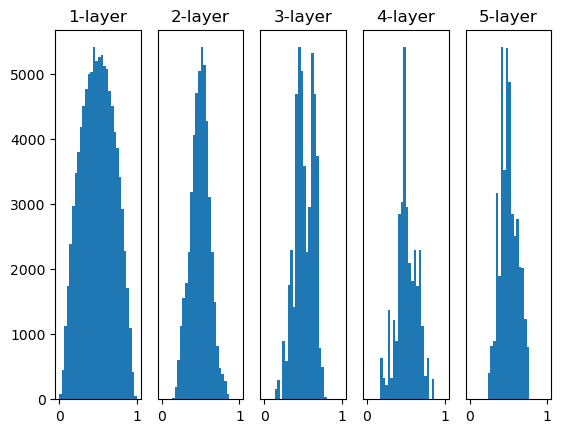

In [9]:
#Xavier 初始值：为了使各层的激活值呈现出具有相同广度的分布，推导了合适的权重尺度：如果前一层的节点数为 n，则初始值使用标准差为1/根号n的分布
#使用 Xavier 初始值后，前一层的节点数越多，要设定为目标节点的初始值的权重尺度就越小
# Xavier 初始值是以激活函数是线性函数为前提而推导出来的

# coding: utf-8
#向一个 5 层神经网络（激活函数使用sigmoid 函数）传入随机生成的输入数据，用直方图绘制各层激活值的数据分布
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000个数据
node_num = 100  # 各隐藏层的节点（神经元）数/前一层的节点数
hidden_layer_size = 5  # 隐藏层有5层
activations = {}  # 激活值的结果保存在这里

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 改变初始值进行实验！
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 将激活函数的种类也改变，来进行实验！
    z = sigmoid(a)  #sigmoid函数是 S 型函数，随着输出不断地靠近 0（或者靠近 1），它的导数的值逐渐接近 0
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 绘制直方图
#使用标准差为 1 的高斯分布作为权重初始值时的各层激活值的分布
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

#从这个结果可知，越是后面的层，图像变得越歪斜，但是呈现了比之前更有广度的分布。因为各层间传递的数据有适当的广度，所以 sigmoid 函数的表现力不受限制，有望进行高效的学习
#这里可使用tanh 函数


2.ReLU 的权重初始值： 当前一层的节点数为 n 时，He 初始值使用标准差为 根号下2/n 的高斯分布。（因为 ReLU 的负值区域的值为 0，为了使它更有广度，所以需要 2 倍的系数）
$$
sigmoid 函数和 tanh 函数左右对称，且中央附近可以视作线性函数，所以适合使用 Xavier 初始值。
$$
    但当激活函数使用 ReLU 时，一般推荐使用 ReLU 专用的初始值：He 初始值

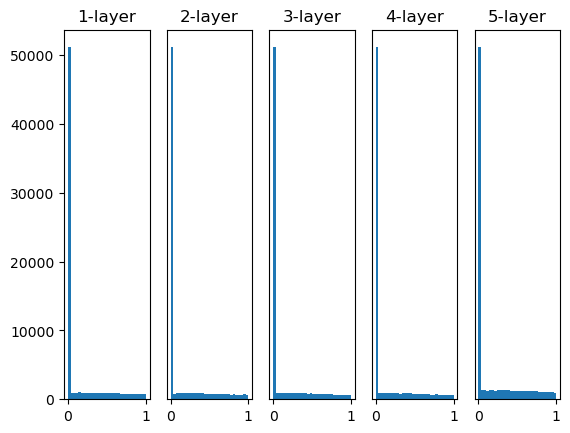

In [11]:
#Xavier 初始值：为了使各层的激活值呈现出具有相同广度的分布，推导了合适的权重尺度：如果前一层的节点数为 n，则初始值使用标准差为1/根号n的分布
#使用 Xavier 初始值后，前一层的节点数越多，要设定为目标节点的初始值的权重尺度就越小
# Xavier 初始值是以激活函数是线性函数为前提而推导出来的

# coding: utf-8
#向一个 5 层神经网络（激活函数使用sigmoid 函数）传入随机生成的输入数据，用直方图绘制各层激活值的数据分布
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000个数据
node_num = 100  # 各隐藏层的节点（神经元）数/前一层的节点数
hidden_layer_size = 5  # 隐藏层有5层
activations = {}  # 激活值的结果保存在这里

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 改变初始值进行实验！
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 将激活函数的种类也改变，来进行实验！
    z = ReLU(a)  #sigmoid函数是 S 型函数，随着输出不断地靠近 0（或者靠近 1），它的导数的值逐渐接近 0
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 绘制直方图
#使用标准差为 1 的高斯分布作为权重初始值时的各层激活值的分布
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

#从这个结果可知，越是后面的层，图像变得越歪斜，但是呈现了比之前更有广度的分布。因为各层间传递的数据有适当的广度，所以 sigmoid 函数的表现力不受限制，有望进行高效的学习
#这里可使用tanh 函数


3.基于 MNIST 数据集的权重初始值的比较

===========iteration:0===========
std=0.01:2.3025061710203736
Xavier:2.320230230336464
He:2.3733610056591052
===========iteration:100===========
std=0.01:2.30304104486289
Xavier:2.2469527321509886
He:1.5150165202201666
===========iteration:200===========
std=0.01:2.3018198084818406
Xavier:2.0894940202675816
He:0.8152770067621817
===========iteration:300===========
std=0.01:2.3002756401086533
Xavier:1.6321041602115716
He:0.45297564252055095
===========iteration:400===========
std=0.01:2.30245274242126
Xavier:1.1925484162632505
He:0.509802923991945
===========iteration:500===========
std=0.01:2.2985282209344042
Xavier:0.8926583605698541
He:0.5542315259137318
===========iteration:600===========
std=0.01:2.303218110124705
Xavier:0.6303343906880412
He:0.31686681099370817
===========iteration:700===========
std=0.01:2.3026292590584463
Xavier:0.608036638269295
He:0.42845772217944333
===========iteration:800===========
std=0.01:2.296652402070195
Xavier:0.3965191115971223
He:0.23057707671896505

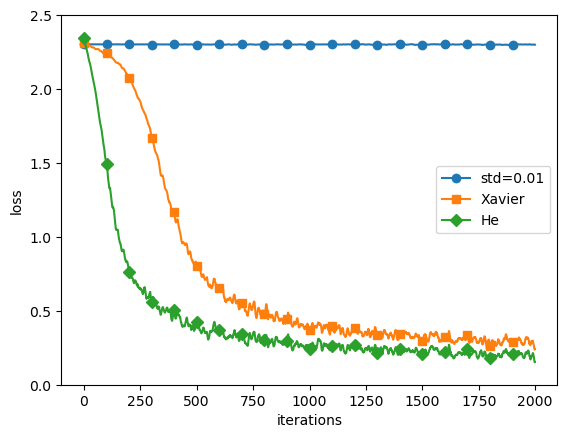

In [ ]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:读入MNIST数据==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:进行实验的设置==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'} #MultiLayerNet通过这个模块调用
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:开始训练==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.绘制图形==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()